In [66]:
import numpy as num
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as pltfrom statsmodels.stats.outliers_influence import variance_inflation_factor

import scikitplot as skl
sns.set()
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
import math
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)
titanic_data.head(5)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("# no of passenger on titanic: ", len(titanic_data.index))

# no of passenger on titanic:  891


In [5]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

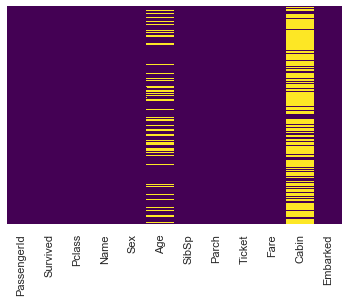

In [7]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

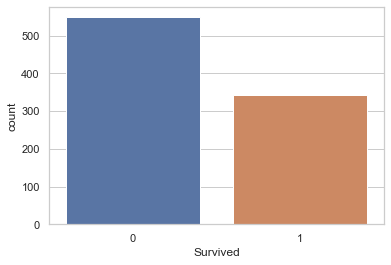

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_data)

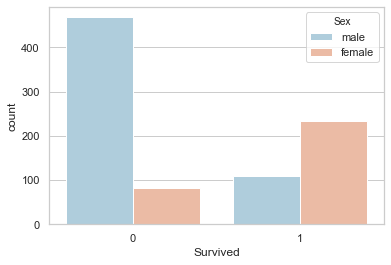

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic_data,palette='RdBu_r')

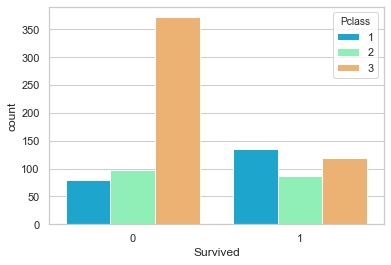

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_data,palette='rainbow')

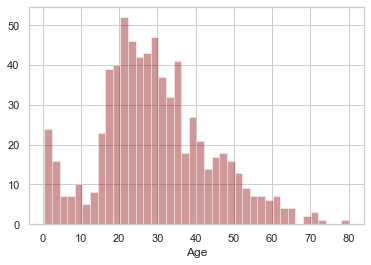

In [13]:
sns.distplot(titanic_data['Age'].dropna(),kde=False,color='darkred',bins=40)

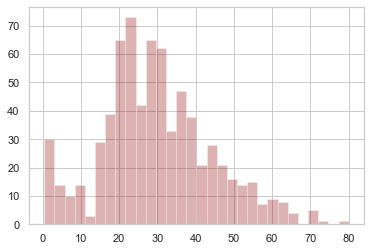

In [14]:
titanic_data['Age'].hist(bins=30,color='darkred',alpha=0.3)

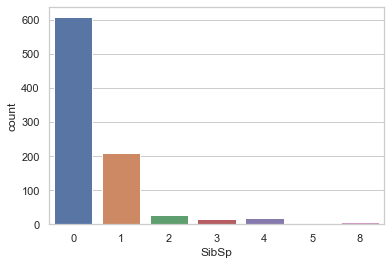

In [16]:
sns.countplot(x='SibSp',data=titanic_data)

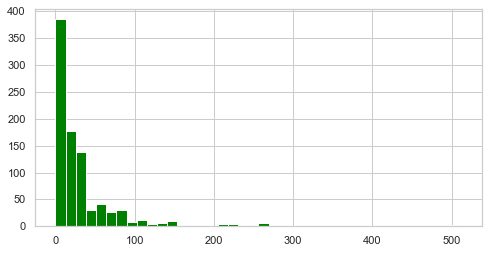

In [18]:
titanic_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [19]:
import cufflinks as cf
cf.go_offline()

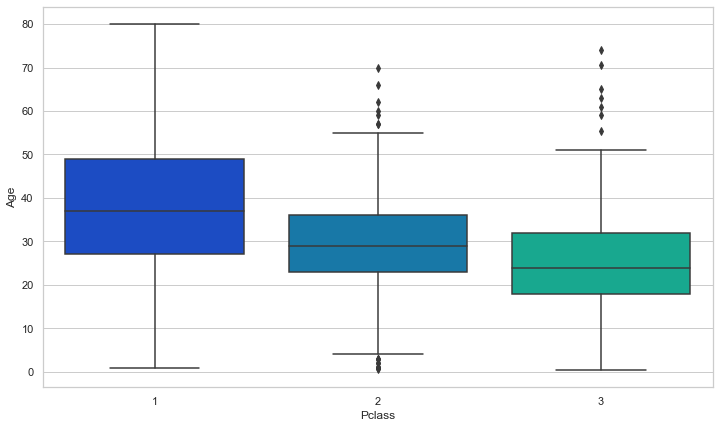

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data,palette='winter')

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [23]:
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(impute_age,axis=1)

In [26]:
titanic_data.drop('Cabin',axis=1,inplace=True)

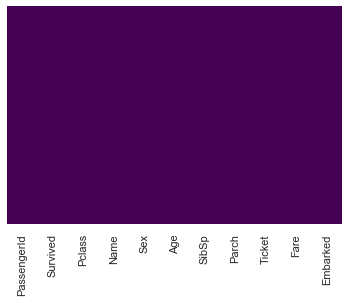

In [27]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
correlation  = titanic_data.corr()                                            # Creating Correlation Matrix
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000


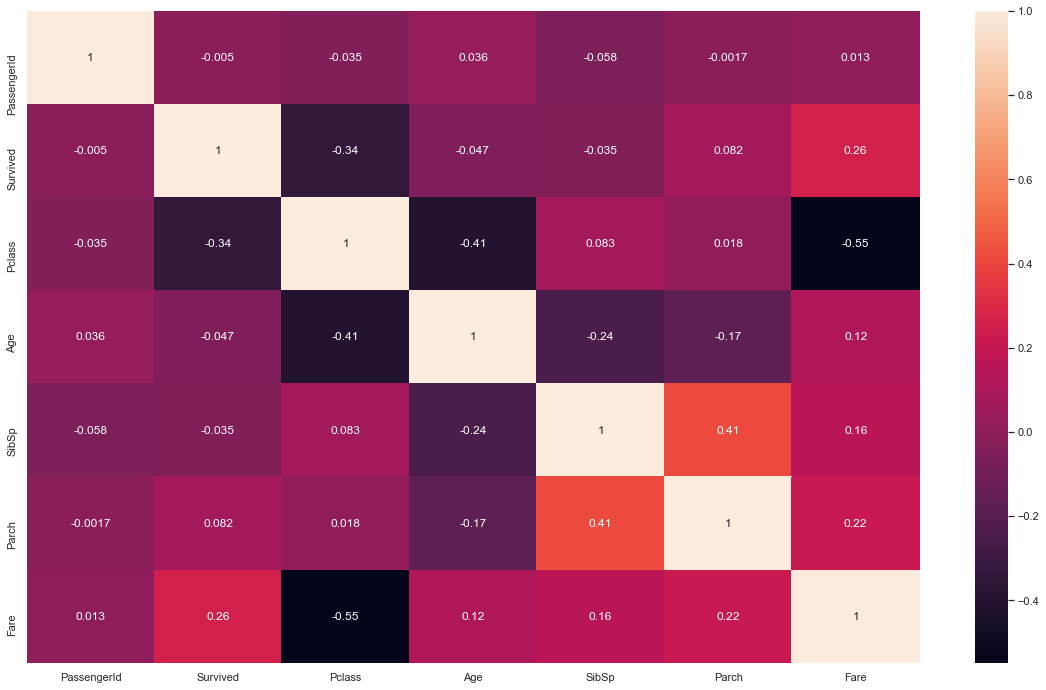

In [31]:
plt.figure(figsize=(20,12))                                        # Creting a blank figure
sns.heatmap(correlation,annot=True)

In [32]:
sex = pd.get_dummies(titanic_data["Sex"],drop_first = True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [33]:
embarked = pd.get_dummies(titanic_data["Embarked"],drop_first = True)
embarked.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
pclass = pd.get_dummies(titanic_data["Pclass"],drop_first = True)
pclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [38]:
titanic_data.drop(columns = ["Ticket","Name", "Parch","PassengerId"], inplace= True)

In [40]:
titanic_data = pd.concat([titanic_data,pclass,sex,embarked] ,axis = 1)

In [41]:
titanic_data.drop(columns = ["Pclass","Sex", "Embarked"], inplace= True)

In [42]:
titanic_data

,Survived,Age,SibSp,Fare,2,3,male,Q,S
0,0,22.0,1,7.2500,0,1,1,0,1
1,1,38.0,1,71.2833,0,0,0,0,0
2,1,26.0,0,7.9250,0,1,0,0,1
3,1,35.0,1,53.1000,0,0,0,0,1
4,0,35.0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,13.0000,1,0,1,0,1
887,1,19.0,0,30.0000,0,0,0,0,1
888,0,24.0,1,23.4500,0,1,0,0,1
889,1,26.0,0,30.0000,0,0,1,0,0


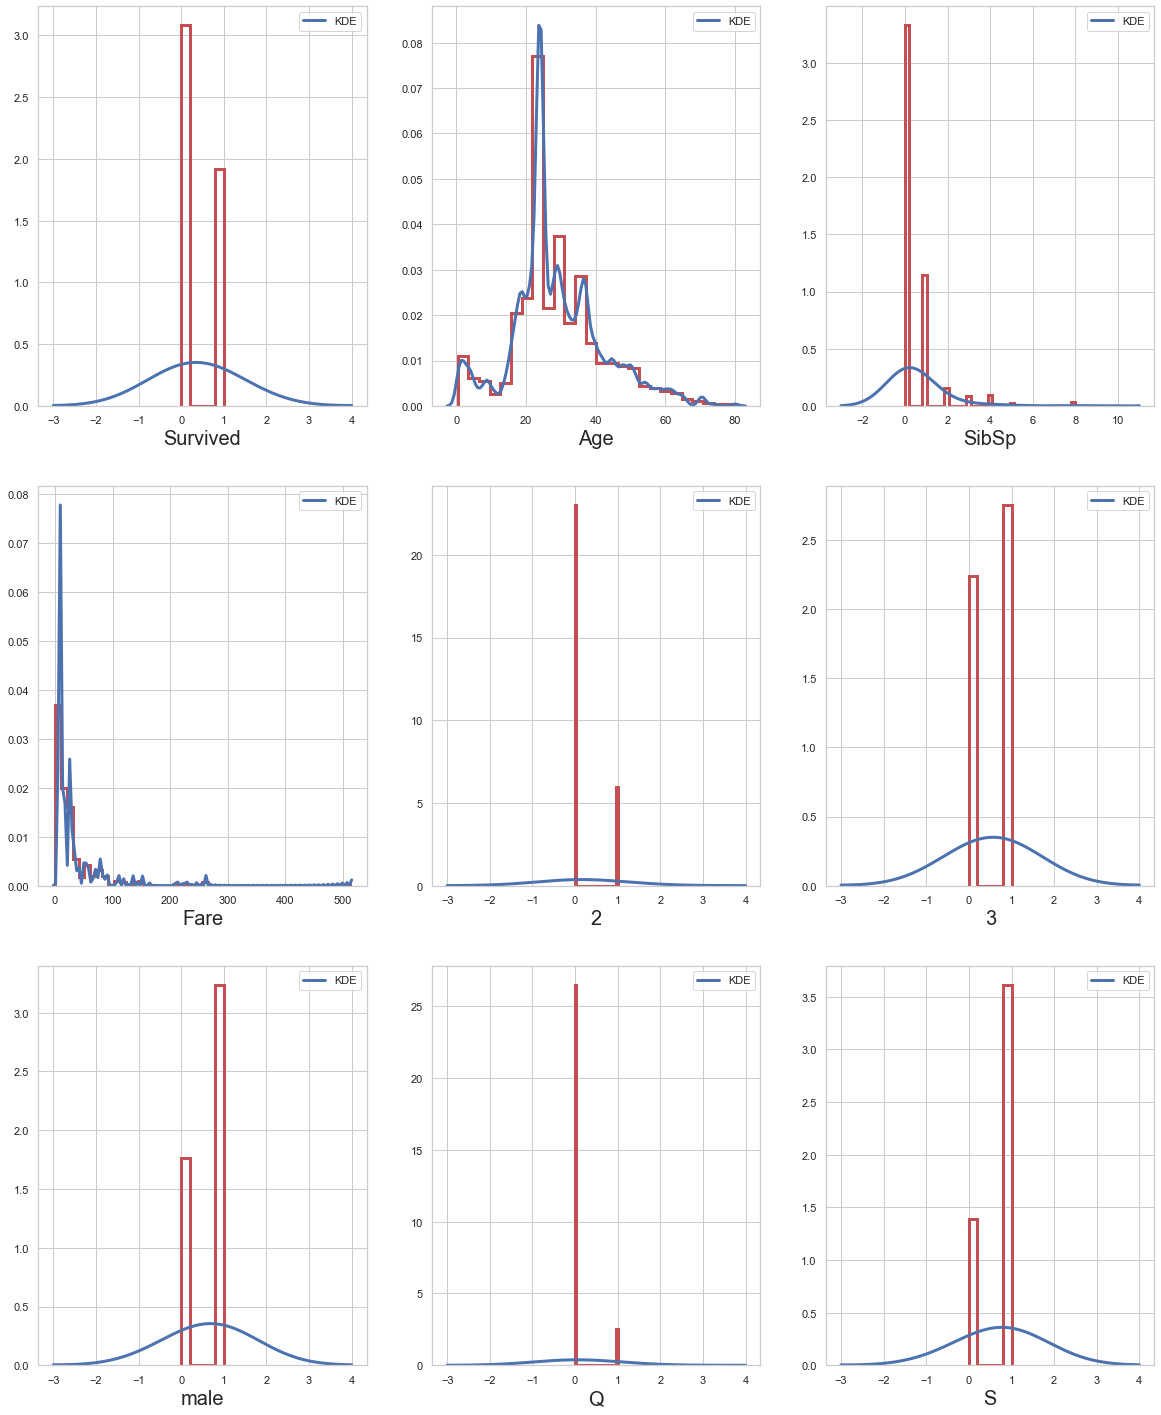

In [45]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in titanic_data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(titanic_data[column],
                       kde_kws={"lw": 3, "label": "KDE", "bw" : 1 },
                       hist_kws={"histtype": "step", "linewidth": 3,
                                 "alpha": 1, "color": "r"})
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

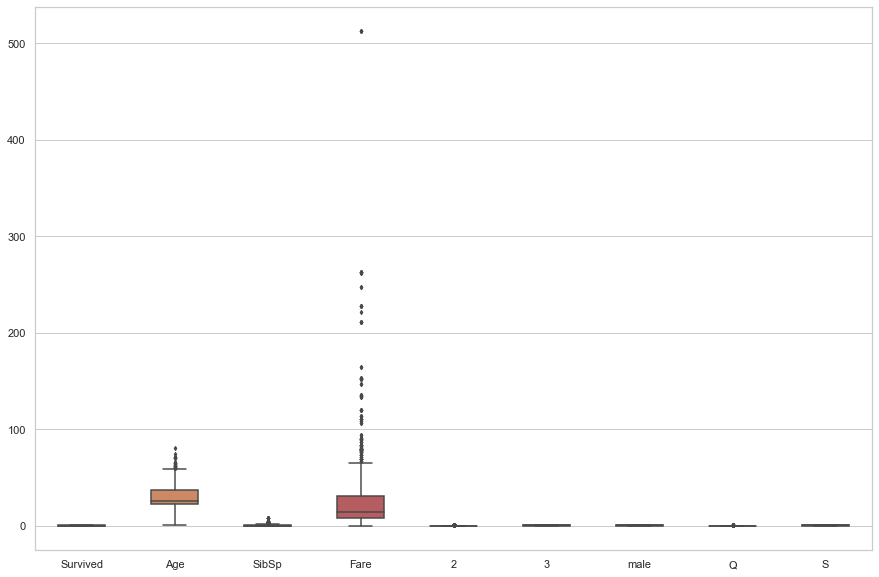

In [47]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data= titanic_data, width= 0.5,ax=ax,  fliersize=3)

In [54]:
q = titanic_data['Fare'].quantile(0.90)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = titanic_data[titanic_data['Fare']<q]
q = data_cleaned['Age'].quantile(0.95)
# we are removing the top 1% data from the BMI column

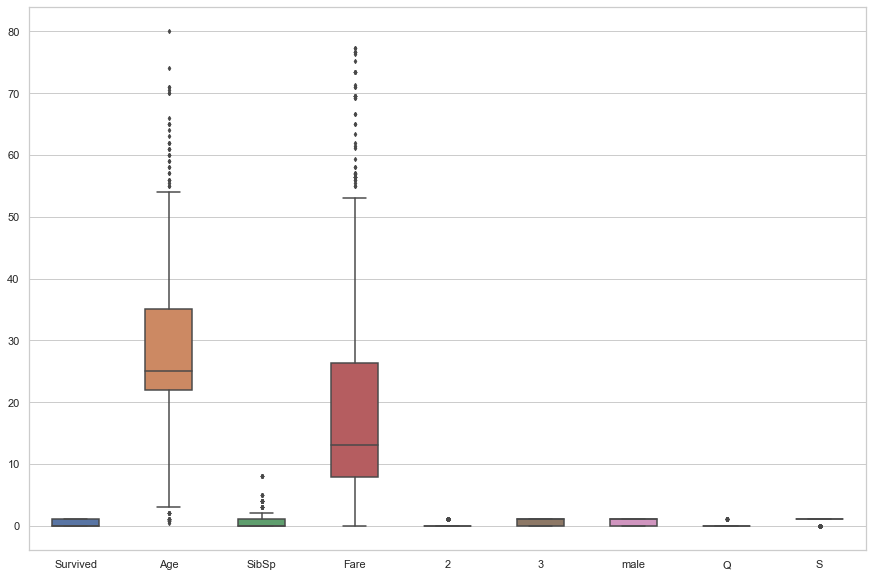

In [53]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data= data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [55]:
x = data_cleaned.drop(columns = ['Survived'])
y = data_cleaned['Survived']

In [57]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [59]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.337505,Age
1,1.718847,SibSp
2,2.525669,Fare
3,2.902230,2
4,4.397267,3
5,1.078965,male
6,1.572157,Q
7,1.559918,S


In [60]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 90)

In [61]:
logmodule= LogisticRegression(n_jobs= 1,multi_class='ovr', solver='liblinear' )

In [62]:
logmodule.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [64]:
predictions = logmodule.predict(x_test)
predictions

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [67]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.84      0.87      0.86       133\n           1       0.73      0.68      0.70        68\n\n    accuracy                           0.81       201\n   macro avg       0.79      0.77      0.78       201\nweighted avg       0.80      0.81      0.80       201\n'

In [68]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[116,  17],
       [ 22,  46]], dtype=int64)

In [69]:
accuracy_score(y_test, predictions)

0.8059701492537313

In [71]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [72]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8721804511278195

In [73]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8405797101449275

In [74]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8560885608856088

In [76]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(logmodule,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [79]:
print(y_test.tail())

47     1
424    0
343    0
38     0
774    1
Name: Survived, dtype: int64


In [81]:
x

,Age,SibSp,Fare,2,3,male,Q,S
0,22.0,1,7.2500,0,1,1,0,1
1,38.0,1,71.2833,0,0,0,0,0
2,26.0,0,7.9250,0,1,0,0,1
3,35.0,1,53.1000,0,0,0,0,1
4,35.0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...
886,27.0,0,13.0000,1,0,1,0,1
887,19.0,0,30.0000,0,0,0,0,1
888,24.0,1,23.4500,0,1,0,0,1
889,26.0,0,30.0000,0,0,1,0,0
